In [1]:
import numpy as np
import scipy.linalg as scp
import matplotlib.pyplot as plt

In [2]:
from src.dynamics import RobotWorld
from src.controllers.lqr import Lqr

# LQR

In [3]:
s_r = [0, 0, 0, 0]

Q = np.eye(4)
R = np.eye(2)

In [6]:
env = RobotWorld()
controller = Lqr(env.A, env.B, Q, R, s_r)

s = env.reset()
trajectory = np.zeros([1000, 4])
trajectory[0] = s

e_d, e_i = np.zeros(2), np.zeros(2)
for i in range(1, 1000):
    u = controller.pi(s)
    s = env.step(u)
    trajectory[i] = s

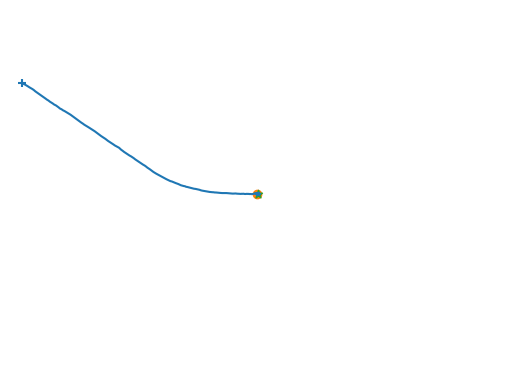

In [7]:
plt.scatter(trajectory[0, 0], trajectory[0, 1], marker='+')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], marker='o')
plt.scatter(s_r[0], s_r[1], marker='*')
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axis('off')
plt.show()

In [104]:
s_r = [0, 0, 0, 0]

Kp = 10.0
Ki = 0.1
Kd = 0.01

Q = np.eye(4)
R = np.eye(2)

In [130]:
def p_control(s):
    return Kp * (s_r[:2] - s)

In [131]:
def pid_control(s, e_d, e_i):
    e = s_r - s
    e_i += e

    p = Kp * e
    i = Ki * e_i
    d = Kd * (e - e_d)
    u = p + i + d

    e_d = e
    return u, e_d, e_i

In [132]:
def solve_lqr(A, B, Q, R):
    P = scp.solve_discrete_are(A, B, Q, R)
    K = np.dot(np.dot(np.linalg.inv(R), B.T), P)
    return K

In [133]:
env = RobotWorld()
K = solve_lqr(env.A, env.B, Q, R)

s = env.s
trajectory = np.zeros([1000, 4])
trajectory[0] = s

e_d, e_i = np.zeros(2), np.zeros(2)
for i in range(1, 1000):
    u = p_control(s)
    # u, e_d, e_i = pid_control(s, e_d, e_i)
    # u = (s_r - s) @ K.T
    s = env.step(u)
    trajectory[i] = s

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 4)

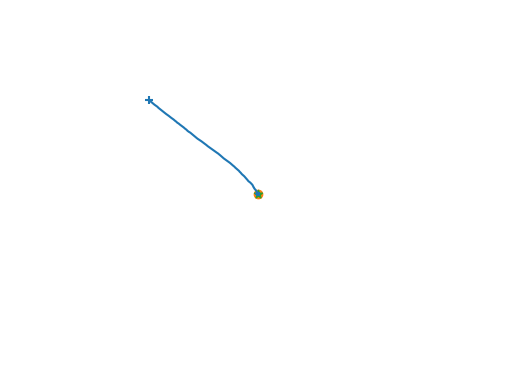

In [129]:
plt.scatter(trajectory[0, 0], trajectory[0, 1], marker='+')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], marker='o')
plt.scatter(s_r[0], s_r[1], marker='*')
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axis('off')
plt.show()